# HR Policy

## 

In [1]:
import mysql.connector as sql
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

In [2]:
hr_data = sql.connect(host='localhost', user='root',password='SAK@2002',database='hr')

In [3]:
mycursor = hr_data.cursor()

# 

## TASK - 1 :

### Write an SQL query in python to extract the country names and the regions associated with them.

In [4]:
country_region = "select country_name, region_name from countries join regions on countries.region_id=regions.region_id;"
mycursor.execute(country_region)
country = mycursor.fetchall()
country

[('Belgium', 'Europe'),
 ('Switzerland', 'Europe'),
 ('Germany', 'Europe'),
 ('Denmark', 'Europe'),
 ('France', 'Europe'),
 ('Italy', 'Europe'),
 ('Netherlands', 'Europe'),
 ('United Kingdom', 'Europe'),
 ('Argentina', 'Americas'),
 ('Brazil', 'Americas'),
 ('Canada', 'Americas'),
 ('Mexico', 'Americas'),
 ('United States of America', 'Americas'),
 ('Australia', 'Asia'),
 ('China', 'Asia'),
 ('HongKong', 'Asia'),
 ('India', 'Asia'),
 ('Japan', 'Asia'),
 ('Singapore', 'Asia'),
 ('Egypt', 'Middle East and Africa'),
 ('Israel', 'Middle East and Africa'),
 ('Kuwait', 'Middle East and Africa'),
 ('Nigeria', 'Middle East and Africa'),
 ('Zambia', 'Middle East and Africa'),
 ('Zimbabwe', 'Middle East and Africa')]

## 

## TASK - 2 :

### Display country-wise employee counts in a new table and push it into a RDBMS this needs joining of tables, Once this task is completed this query can be executed directly using MySQL without the need of joins.

In [5]:
country_count = """select country_name, count(employee_id) from countries
join locations on countries.country_id = locations.country_id
join departments on locations.location_id = departments.location_id
join employees on departments.department_id = employees.department_id group by country_name;"""

In [6]:
mycursor.execute(country_count)
emp_count = mycursor.fetchall()

In [7]:
emp_count = pd.DataFrame(emp_count)
emp_count.columns=["Country","Employee_Count"]

In [8]:
emp_count.values

array([['United States of America', 68],
       ['Canada', 2],
       ['United Kingdom', 35],
       ['Germany', 1]], dtype=object)

In [9]:
hostname="localhost"
dbname="hr"  
uname="root"
pwd="SAK%402002"

engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}"
.format(host=hostname, db=dbname, user=uname, pw=pwd))

emp_count.to_sql('employee_count', engine, index=False)

4

In [10]:
hr_data = sql.connect(host='localhost', user='root',password='SAK@2002',database='hr')

### 

## TASK - 3 :

### Display the country wise and city wise count of employees.

In [11]:
city_count = """select country_name, city, count(employee_id) from countries 
join locations on countries.country_id = locations.country_id
join departments on locations.location_id = departments.location_id
join employees on departments.department_id = employees.department_id group by country_name, city;"""

In [12]:
mycursor = hr_data.cursor()

In [13]:
mycursor.execute(city_count)
con_city_count = mycursor.fetchall()

In [14]:
con_city_count = pd.DataFrame(con_city_count)
con_city_count.columns = ["Country","City","Employee_count"]
con_city_count

,Country,City,Employee_count
0,United States of America,Southlake,5
1,United States of America,South San Francisco,45
2,United States of America,Seattle,18
3,Canada,Toronto,2
4,United Kingdom,London,1
5,United Kingdom,Oxford,34
6,Germany,Munich,1


<Axes: title={'center': 'Country and City wise count of Employees'}, xlabel='City Name'>

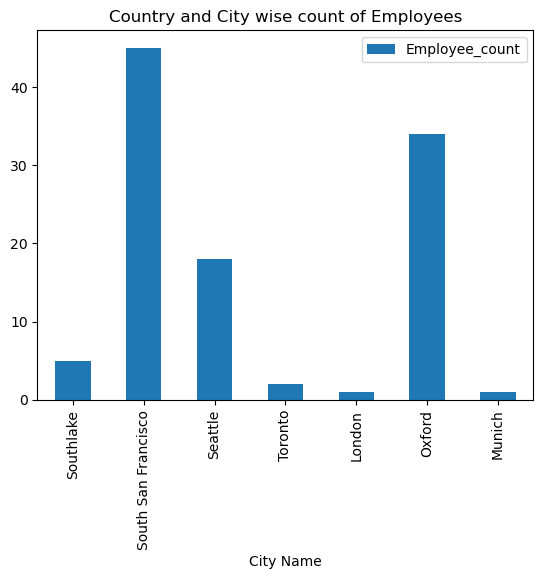

In [15]:
con_city_count.plot(x="City",
                    kind="bar",
                    stacked=False,title="Country and City wise count of Employees",xlabel="City Name")